Loaded model from '../src/ais_model_fold_5.pkl'.
Random Sample Predictions:
   Sample Index  True Label  Predicted Label  Prediction Probability
0      15047677           1                1                0.832914
1      14185700           1                1                0.906402
2       8753685           1                1                0.993865
3       8652243           1                1                0.973712
4      20383046           1                1                0.978792
5      17558889           0                0                0.003033
6      26376168           0                0                0.000179
7      26218719           1                1                0.953149
8      20383494           0                0                0.103110
9      12179868           0                0                0.005276


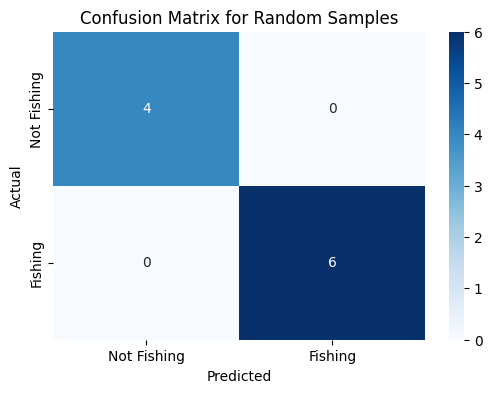


Classification Report for Random Samples:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [1]:
# Import necessary libraries
import joblib
import pandas as pd
import numpy as np
from data_loader import load_and_preprocess_ais_data  # Import the data loader function
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed AIS data
ais_data_dir = "../data/ais/ais-sample-data"
ais_data = load_and_preprocess_ais_data(ais_data_dir)

# Encode 'source' column if it exists
if 'source' in ais_data.columns:
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    ais_data['source'] = encoder.fit_transform(ais_data['source'])

# Separate features and labels
X = ais_data.drop(columns=['is_fishing'])
y = ais_data['is_fishing']

# Load the trained model (e.g., from the last fold)
model_filename = "../src/ais_model_fold_5.pkl"  # Change the fold number if needed
model = joblib.load(model_filename)
print(f"Loaded model from '{model_filename}'.")

# Select random samples from the training data
random_samples = X.sample(10, random_state=42)  # Select 10 random samples
random_labels = y.loc[random_samples.index]  # Get the true labels for the samples

# Make predictions on the random samples
predictions = model.predict(random_samples)
predicted_probabilities = model.predict_proba(random_samples)[:, 1]

# Display the results
results = pd.DataFrame({
    "Sample Index": random_samples.index,
    "True Label": random_labels.values,
    "Predicted Label": predictions,
    "Prediction Probability": predicted_probabilities
})
print("Random Sample Predictions:")
print(results)

# Plot a confusion matrix for the random samples
cm = confusion_matrix(random_labels, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fishing', 'Fishing'], yticklabels=['Not Fishing', 'Fishing'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Samples")
plt.show()

# Display classification report for the random samples
print("\nClassification Report for Random Samples:")
print(classification_report(random_labels, predictions))